In [ ]:
!pip install ydata_profiling
!pip install tensorflow

In [ ]:
import random
import itertools
import datetime

import warnings
from itertools import product
from skimage.transform import resize
from matplotlib.pyplot import imshow
from IPython.display import clear_output
import concurrent.futures

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score,confusion_matrix, classification_report, ConfusionMatrixDisplay

from PIL import Image, ImageEnhance
import multiprocessing
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV

plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

In [ ]:
bp = pd.read_csv('bitcoin_2017_to_2023_1min_timestamp.csv')
bp

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611
...,...,...,...,...,...,...,...,...,...,...
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000


In [ ]:
bp.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


In [ ]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [ ]:
bp.shape

(3126000, 10)

In [ ]:
bp.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [ ]:
bp = bp.set_index('timestamp')
bp

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836
2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195
2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121
2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916
2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611
...,...,...,...,...,...,...,...,...,...
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921


In [ ]:
bp.index = pd.to_datetime(bp.index)
bp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3126000 entries, 2023-08-01 13:19:00 to 2017-08-17 04:00:00
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   open                          float64
 1   high                          float64
 2   low                           float64
 3   close                         float64
 4   volume                        float64
 5   quote_asset_volume            float64
 6   number_of_trades              int64  
 7   taker_buy_base_asset_volume   float64
 8   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1)
memory usage: 238.5 MB


In [ ]:
bp["dayofweek"] = bp.index.dayofweek
bp["month"] = bp.index.month
bp["quarter"] = bp.index.quarter
bp["year"] = bp.index.year
bp["dayofyear"] = bp.index.dayofyear
bp

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,dayofweek,month,quarter,year,dayofyear
timestamp,,,,,,,,,,,,,,
2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836,1,8,3,2023,213
2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195,1,8,3,2023,213
2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121,1,8,3,2023,213
2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916,1,8,3,2023,213
2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611,1,8,3,2023,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338,3,8,3,2017,229
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852,3,8,3,2017,229
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921,3,8,3,2017,229


In [ ]:
A = bp.groupby('volume').mean()
A

,open,high,low,close,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,dayofweek,month,quarter,year,dayofyear
volume,,,,,,,,,,,,,
0.000000,4804.430063,4804.430063,4804.430063,4804.430063,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3.24494,9.032226,3.2876,2017.038051,259.813854
0.000001,5814.792500,5814.792500,5814.792500,5814.792500,5.814792e-03,1.0,5.000000e-07,3.190252e-03,0.50000,10.500000,3.7500,2017.000000,300.000000
0.000002,8941.190000,8941.190000,8939.980000,8939.980000,1.788117e-02,2.0,2.000000e-06,1.788117e-02,6.00000,11.000000,4.0000,2017.000000,330.000000
0.000003,3870.000000,3870.000000,3870.000000,3870.000000,1.161000e-02,1.0,0.000000e+00,0.000000e+00,3.00000,9.000000,3.0000,2017.000000,257.000000
0.000004,8700.590000,8700.590000,8700.590000,8700.590000,3.480236e-02,1.0,4.000000e-06,3.480236e-02,6.00000,11.000000,4.0000,2017.000000,330.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282.332120,16634.840000,17384.370000,16548.140000,17371.730000,7.289091e+07,53086.0,2.443194e+03,4.160466e+07,3.00000,11.000000,4.0000,2022.000000,314.000000
4448.796350,18687.040000,18700.000000,18518.820000,18529.550000,8.276781e+07,31953.0,2.851740e+03,5.305411e+07,1.00000,11.000000,4.0000,2022.000000,312.000000
4522.816080,24964.870000,25300.000000,24960.910000,25262.940000,1.137392e+08,72754.0,2.836380e+03,7.134739e+07,1.00000,3.000000,1.0000,2023.000000,73.000000


<Axes: title={'center': 'bitcoin'}, xlabel='timestamp'>

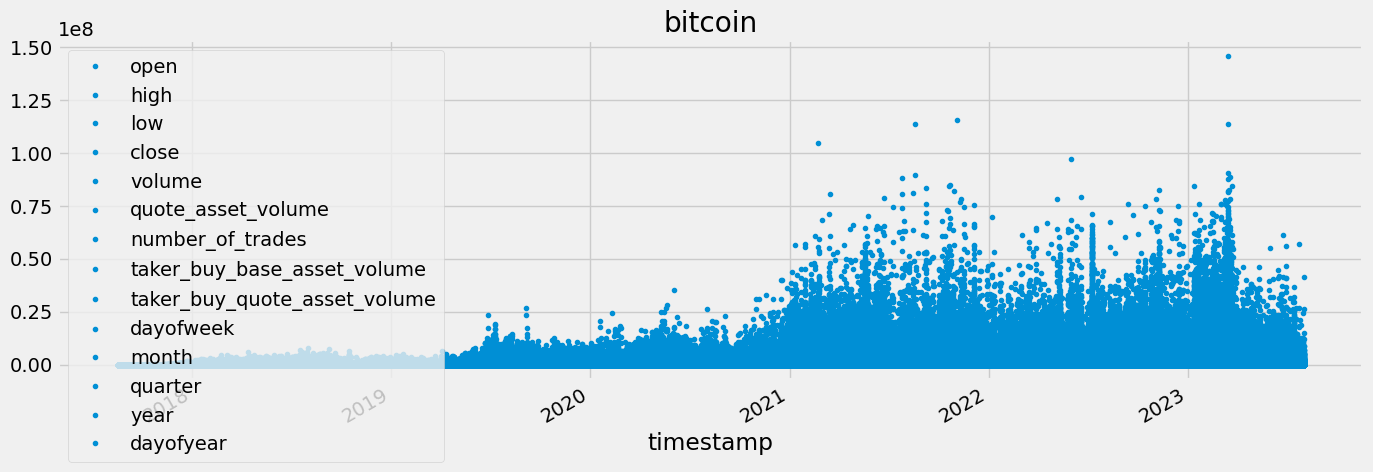

In [ ]:
bp.plot(figsize=(15,5),style='.',color=color_pal[0],title='bitcoin')

Text(0.5, 1.0, 'Volume Per Year')

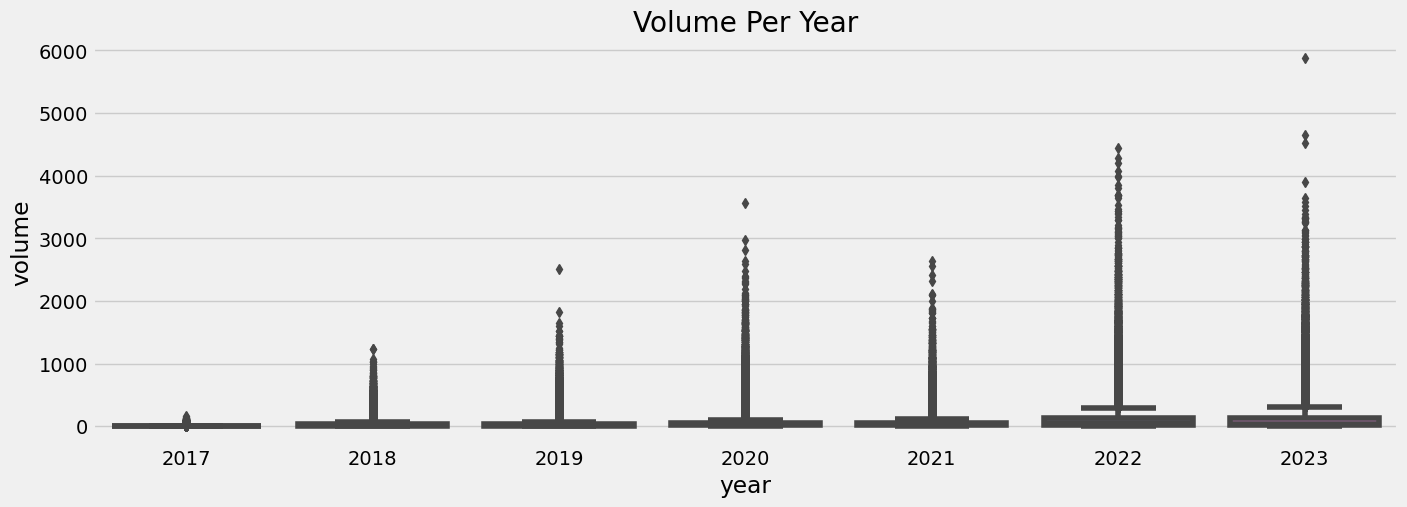

In [ ]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=bp,x='year',y='volume')
plt.title('Volume Per Year')

C:\Users\RISHAV RAJ SINGH\AppData\Local\Temp\ipykernel_31996\4190996067.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("train","test")


Text(0.5, 1.0, 'Train Test Split')

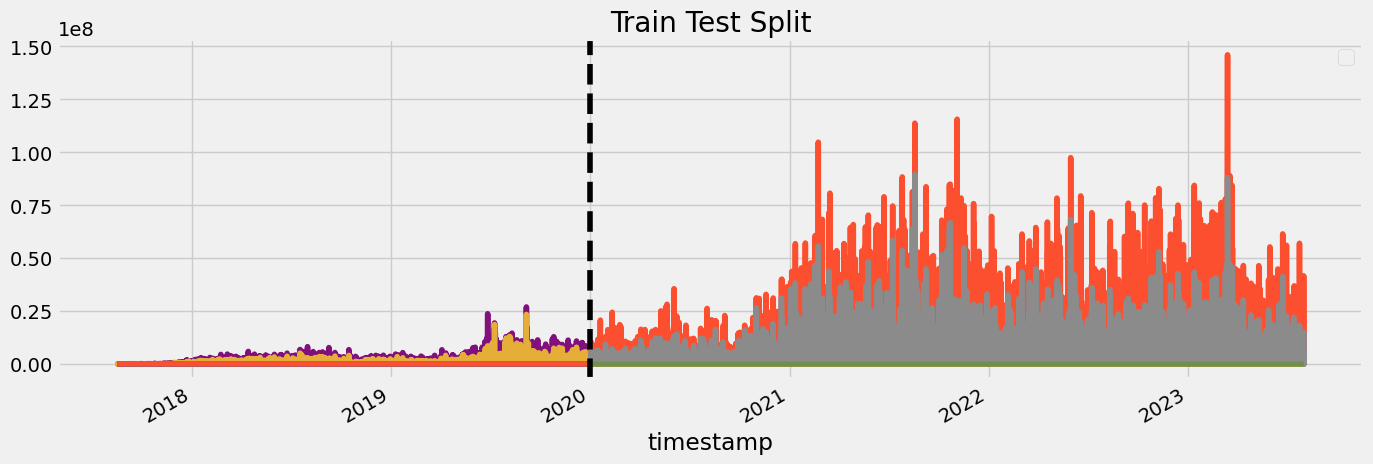

In [ ]:
train = bp.loc[bp.index<"01-01-2020"]
test = bp.loc[bp.index>="01-01-2020"]


fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline("01-01-2020",color='black',ls='--')
plt.legend("train","test")
plt.title('Train Test Split')

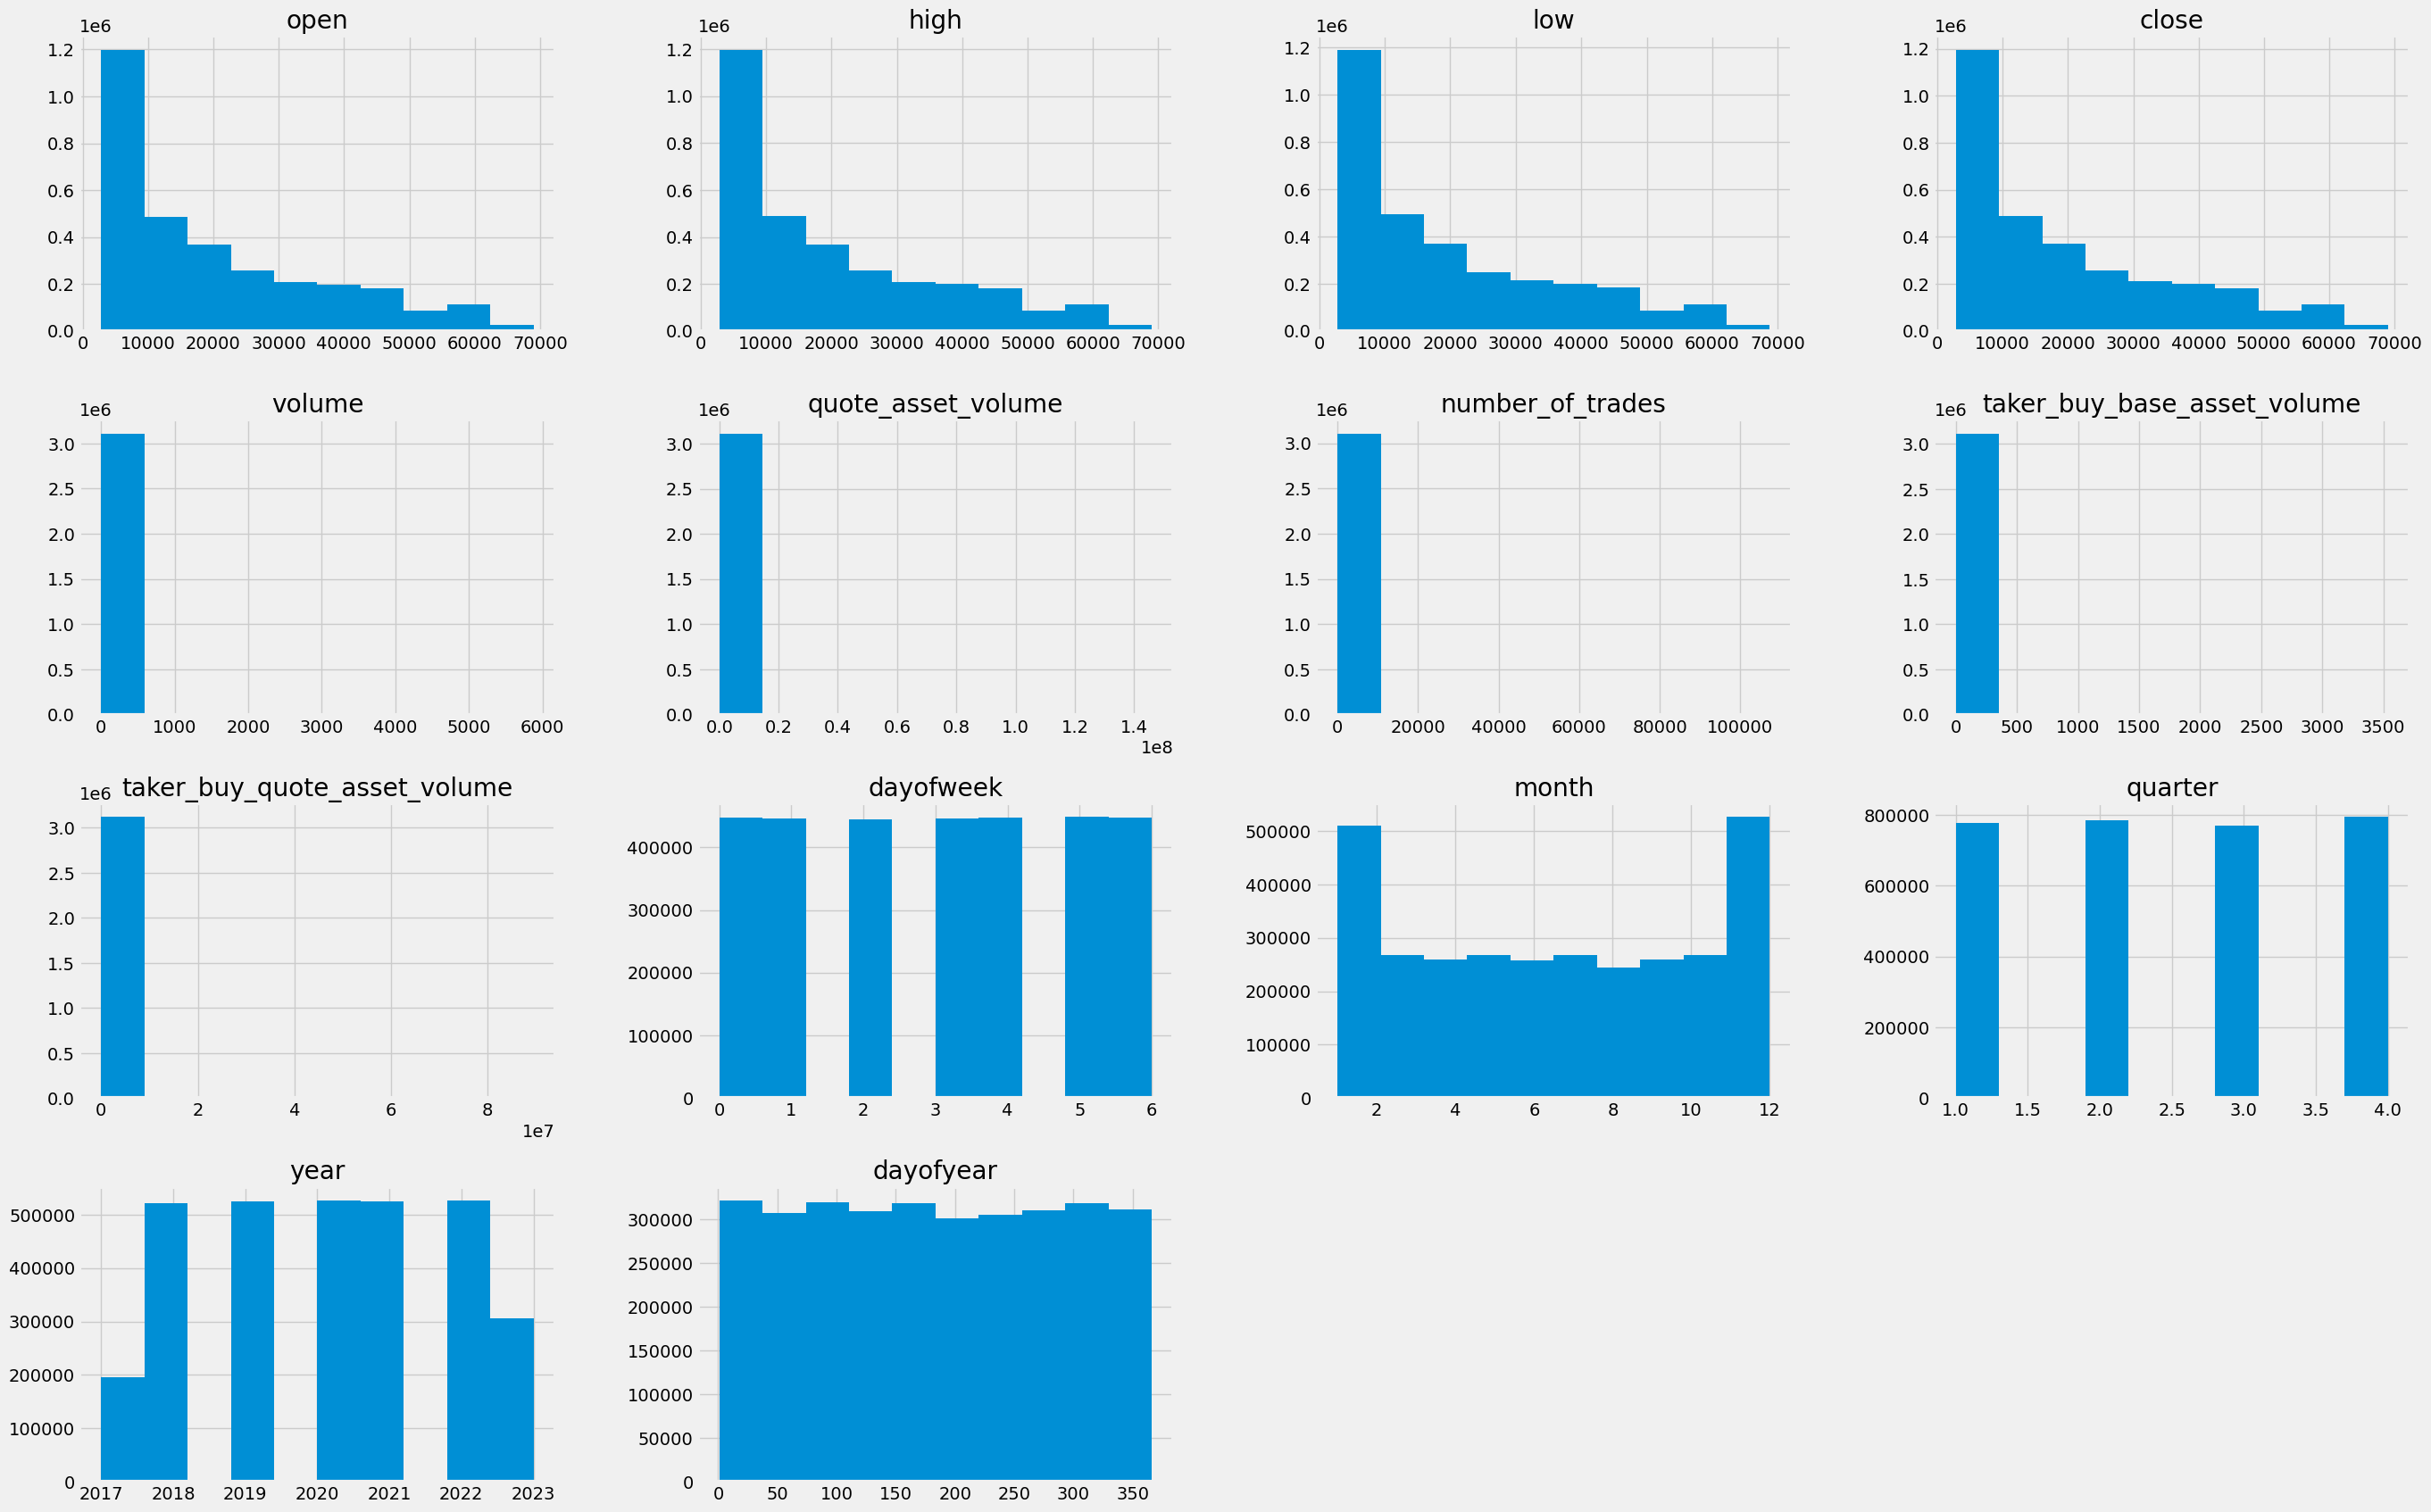

In [ ]:
bp.hist(figsize=(30,20))
plt.show()

C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

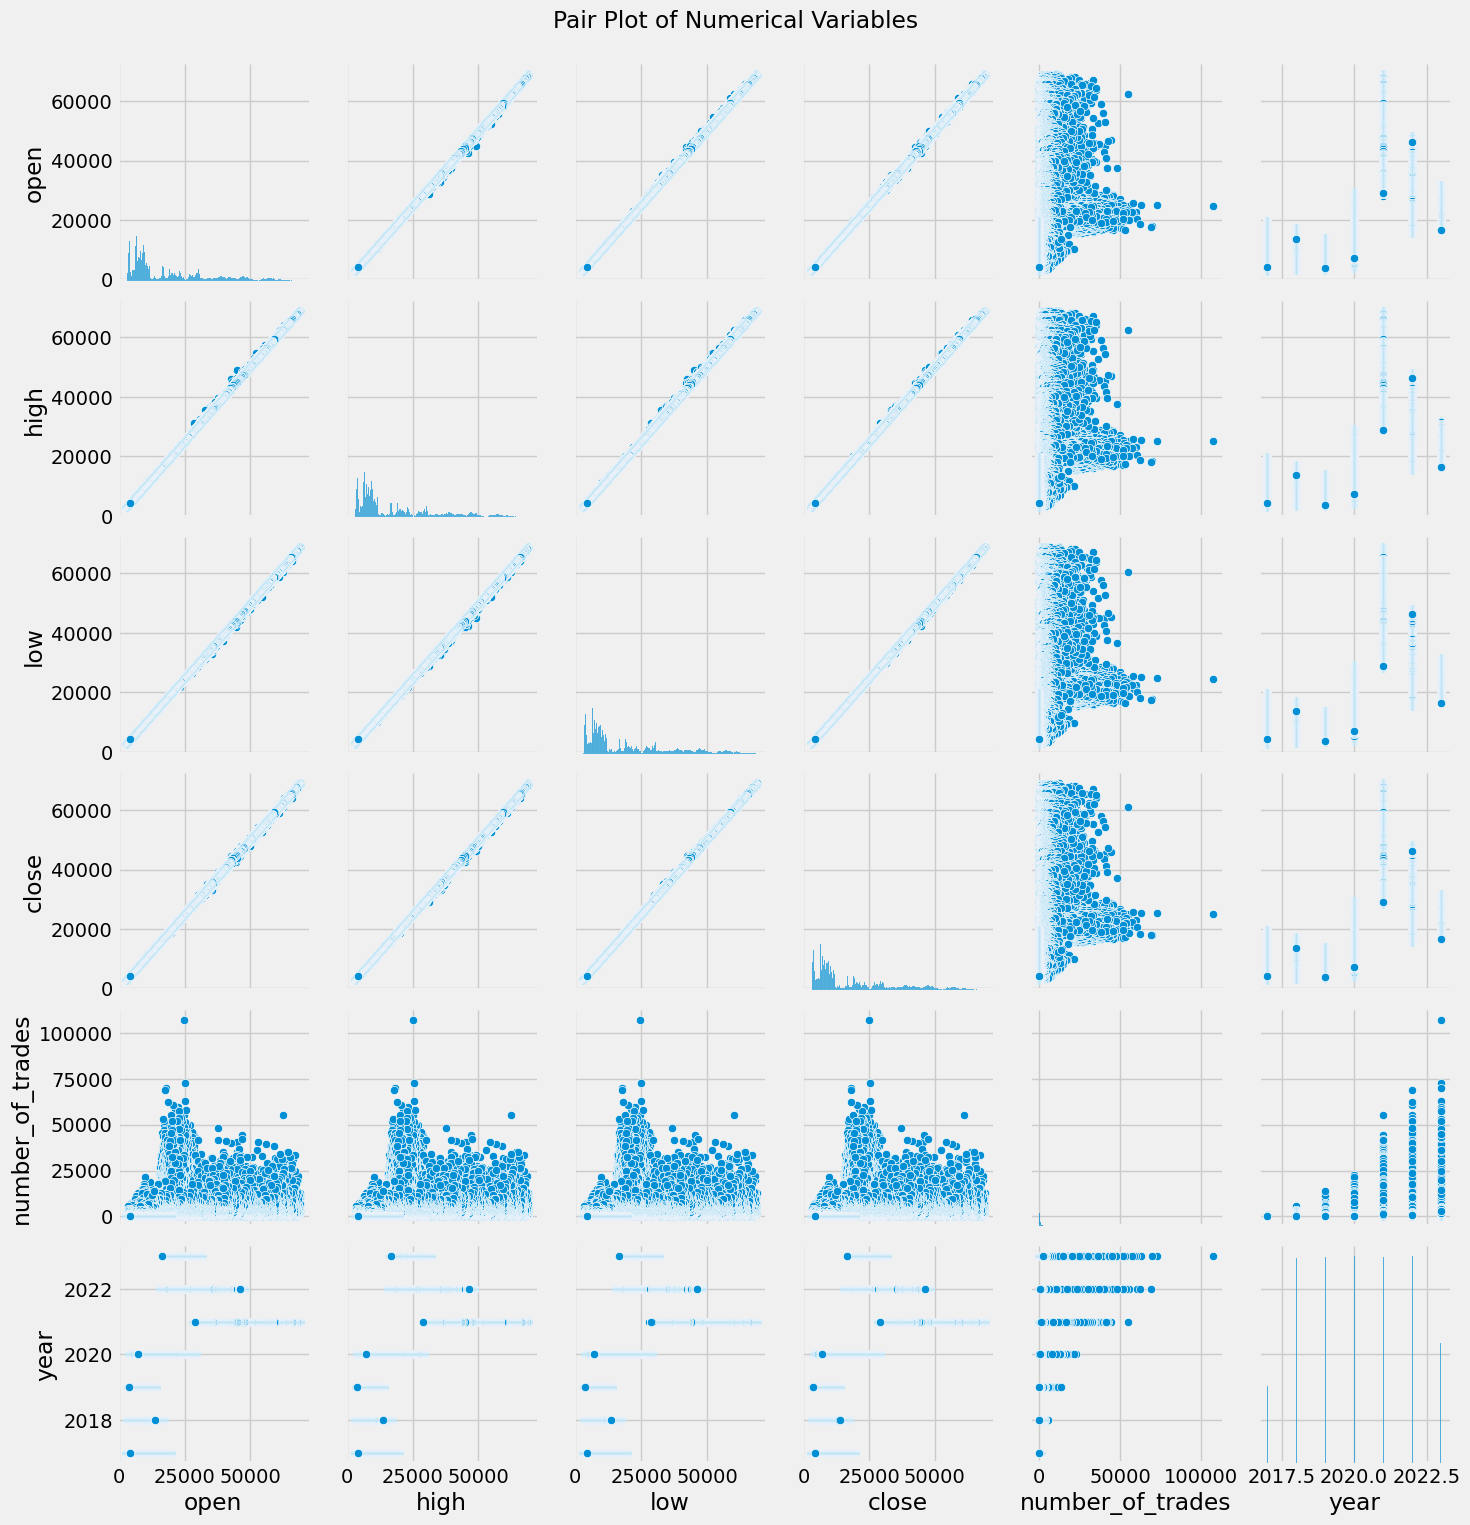

In [ ]:
numerical_columns = ['open', 'high', 'low', 'close', 'number_of_trades', 'year']

sns.pairplot(bp[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

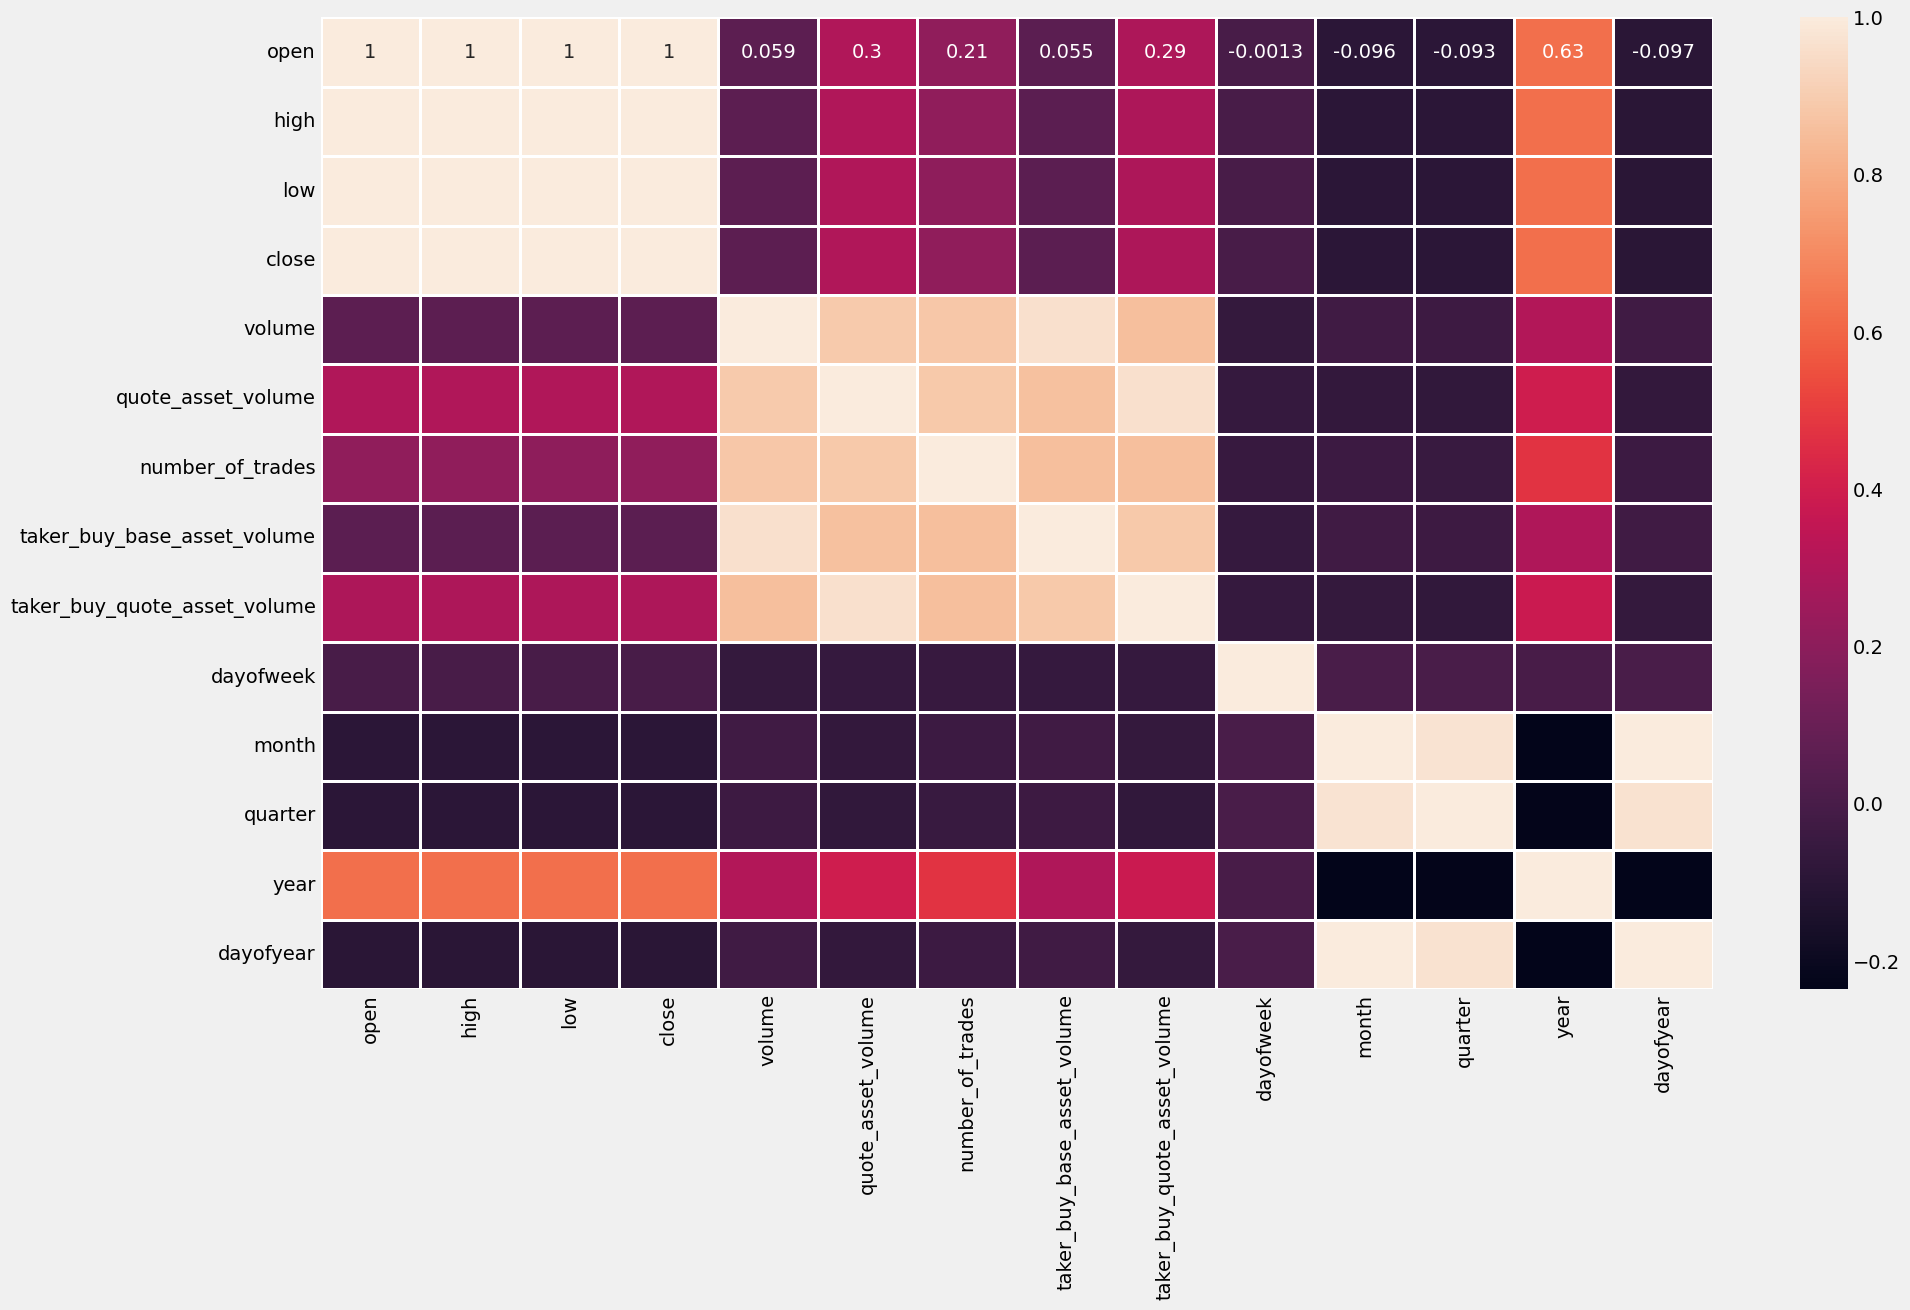

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(bp.corr(),annot=True,linewidths=1)
plt.show()

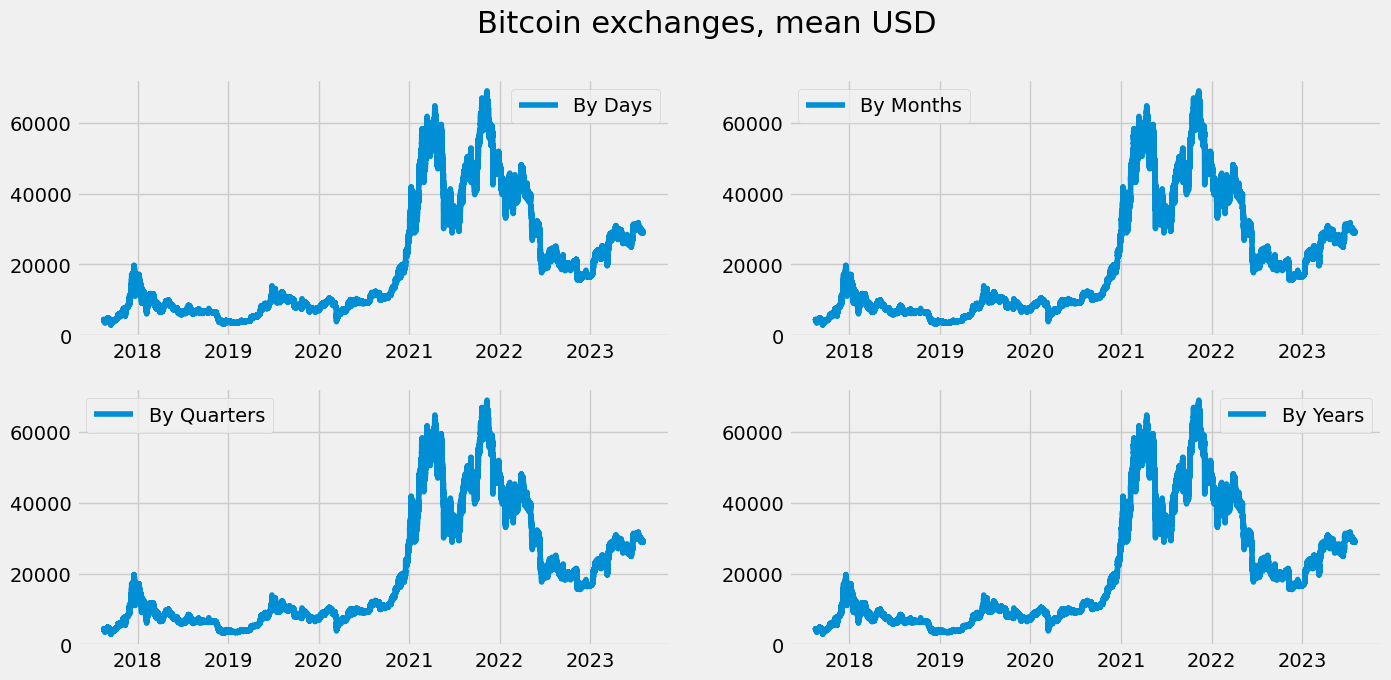

In [ ]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(bp.open, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(bp.open, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(bp.open, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(bp.open, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()